In [67]:
# Two methods of applying sentiment analysis would be explored
# Method 1 ==> Creation of Custom Model
  # Load and clean the text using NLTK
  # Create a bag of words matrix features => (feature 1)
  # Create a TF-IDF matrix features => (feature 2)
  # Create two Naive Bayes Models based on BOW and TF-IDF

# Method 2 ==> Using the pretrained model "VADER"
  # Look at pretrained sentiment analyzers
  # Leverage VADER for sentiment analysis

# Evaluate all the three models using the test.csv

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

RSEED=42

In [3]:
# load the train data
train = pd.read_csv('/Users/olugbengaoloyade/Documents/Movies_review/notebook/train.csv')
train.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [4]:
# check the sentiment column
train['sentiment']

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
24995    pos
24996    pos
24997    neg
24998    neg
24999    neg
Name: sentiment, Length: 25000, dtype: object

In [5]:
len(train)

25000

<Axes: xlabel='sentiment', ylabel='Count'>

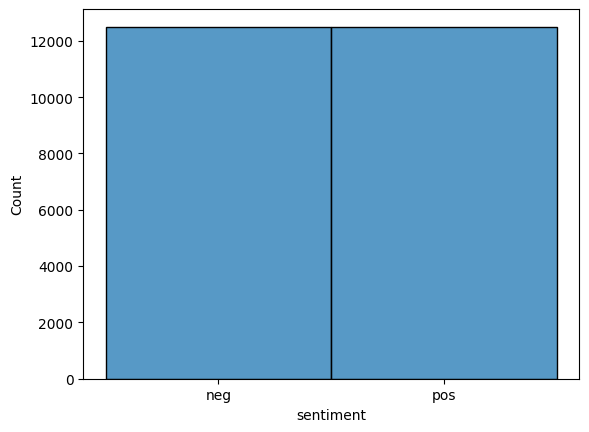

In [6]:
# plotting the number of pos and neg in the dataset
sns.histplot(train['sentiment'])

In [7]:
example = train['text'].iloc[12]
example

"My kids picked this out at the video store...it's great to hear Liza as Dorothy cause she sounds just like her mom. But there are too many bad songs, and the animation is pretty crude compared to other cartoons of that time."

In [8]:
# check the sentiment

train['sentiment'].iloc[12]

'neg'

In [9]:
example.split()

['My',
 'kids',
 'picked',
 'this',
 'out',
 'at',
 'the',
 'video',
 "store...it's",
 'great',
 'to',
 'hear',
 'Liza',
 'as',
 'Dorothy',
 'cause',
 'she',
 'sounds',
 'just',
 'like',
 'her',
 'mom.',
 'But',
 'there',
 'are',
 'too',
 'many',
 'bad',
 'songs,',
 'and',
 'the',
 'animation',
 'is',
 'pretty',
 'crude',
 'compared',
 'to',
 'other',
 'cartoons',
 'of',
 'that',
 'time.']

In [10]:
# check the number of words
len(example.split())

42

In [11]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
# import nltk
# import stop words
# import tokenize
# download stop words

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download("stopwords")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olugbengaoloyade/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olugbengaoloyade/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
nltk.download('punkt', download_dir='/Users/olugbengaoloyade/nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olugbengaoloyade/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import os
nltk.data.path.append('/Users/olugbengaoloyade/nltk_data')


In [23]:
from nltk.tokenize import word_tokenize

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# convert the stopwords to a set to avoid duplicates and save as a variable
stop_words = set(stopwords.words('english'))

In [24]:
word_tokens = word_tokenize(example)
word_tokens

['My',
 'kids',
 'picked',
 'this',
 'out',
 'at',
 'the',
 'video',
 'store',
 '...',
 'it',
 "'s",
 'great',
 'to',
 'hear',
 'Liza',
 'as',
 'Dorothy',
 'cause',
 'she',
 'sounds',
 'just',
 'like',
 'her',
 'mom',
 '.',
 'But',
 'there',
 'are',
 'too',
 'many',
 'bad',
 'songs',
 ',',
 'and',
 'the',
 'animation',
 'is',
 'pretty',
 'crude',
 'compared',
 'to',
 'other',
 'cartoons',
 'of',
 'that',
 'time',
 '.']

In [25]:
# remove stop words
filtered_text = [word for word in word_tokens if word.lower() not in stop_words] #words that are not in the downloaded stopwords
filtered_text

['kids',
 'picked',
 'video',
 'store',
 '...',
 "'s",
 'great',
 'hear',
 'Liza',
 'Dorothy',
 'cause',
 'sounds',
 'like',
 'mom',
 '.',
 'many',
 'bad',
 'songs',
 ',',
 'animation',
 'pretty',
 'crude',
 'compared',
 'cartoons',
 'time',
 '.']

In [26]:
# convert the list 'filtered_text' to string
' '.join(filtered_text)

"kids picked video store ... 's great hear Liza Dorothy cause sounds like mom . many bad songs , animation pretty crude compared cartoons time ."

In [ ]:
# create the function to filter out stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english')) # downloaded stopwords turned into set
    word_tokens = word_tokenize(text) # the text under consideration
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words] #words that are not in the downloaded stopwords
    return ' '.join(filtered_text)

In [28]:
# remove stopwords using the function 'remove_stopwords'
remove_stopwords(train['text'].iloc[23]) # the function can take in any specified text

"Although seen mini-series twenty years still remember balance character , plot tale marvelous adventures succeeded . use special effects restrained making poetic rather literal telling story . two versions 've seen dubbed ( English French ) actors appear speak language Italian synchronization problem . spoil story telling . Among cast Irene Pappas Penelope recognizable North Americans . Recommended followers Odysseus ' ever returning ."

In [30]:
# to see the progress bar when the apply function is running
!pip install tqdm

In [32]:
from tqdm import tqdm
tqdm.pandas()

In [33]:
# apply the function to the text column of train.csv

train['clean_text'] = train['text'].progress_apply(remove_stopwords) # this will show the progress bar

100%|██████████| 25000/25000 [00:17<00:00, 1420.07it/s]


In [34]:
train['clean_text'].iloc[0]

", wo n't deny purchased eBay , high expectations . incredible out-of-print work master comedy enjoy . However , soon disappointed . Apologies enjoyed , found Compleat Al difficult watch . got smiles , sure , majority funny came music videos ( 've got DVD ) rest basically filler . could tell Al 's greatest video achievement ( honor goes UHF ) . Honestly , doubt ever make jump DVD , 're ultra-hardcore Al fan everything , buy tape eBay . n't pay much ."

In [35]:
# create bag of words and TF-IDF

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [36]:
# bag of words vectorizer
vectorizer_bow = CountVectorizer()

In [37]:
# bag of words matrix
bow_matrix = vectorizer_bow.fit_transform(train['clean_text'])

In [38]:
# tfidf vectorizer
vectorizer_tfidf = TfidfVectorizer()

In [39]:
tfidf_matrix = vectorizer_tfidf.fit_transform(train['clean_text'])

In [40]:
tfidf_matrix

<25000x74833 sparse matrix of type '<class 'numpy.float64'>'
	with 2512790 stored elements in Compressed Sparse Row format>

In [41]:
bow_matrix

<25000x74833 sparse matrix of type '<class 'numpy.int64'>'
	with 2512790 stored elements in Compressed Sparse Row format>

#### Models Creation

In [42]:
# Naive Bayes is good for sparse matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [43]:
# Training Naive Bayes using Bag of Words
X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow_matrix, train['sentiment'], test_size = 0.1, random_state = RSEED)

# for tfidf
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_matrix, train['sentiment'], test_size = 0.1, random_state = RSEED)

In [44]:
#training model on bag of words

nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [45]:
#training model on tfidf

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [46]:
y_pred_bow = nb_bow.predict(X_test_bow)

In [47]:
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

In [48]:
accuracy_bow = accuracy_score(y_test, y_pred_bow)

print('BOW Accuracy :', accuracy_bow)

print(classification_report(y_test, y_pred_bow))

BOW Accuracy : 0.8644
              precision    recall  f1-score   support

         neg       0.85      0.89      0.87      1266
         pos       0.88      0.84      0.86      1234

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



In [49]:
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print('BOW Accuracy :', accuracy_tfidf)

print(classification_report(y_test, y_pred_tfidf))

BOW Accuracy : 0.868
              precision    recall  f1-score   support

         neg       0.86      0.88      0.87      1266
         pos       0.88      0.85      0.86      1234

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500



### LEVERAGING PRETRAINED MODEL - VADER

In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [51]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/olugbengaoloyade/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
analyzer = SentimentIntensityAnalyzer()

In [53]:
def generate_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0:
        return 'pos'
    else:
        return 'neg'

In [54]:
train['predictions'] = train['text'].progress_apply(generate_sentiment)

100%|██████████| 25000/25000 [00:24<00:00, 1010.24it/s]


In [55]:
# Model scores

accuracy_vader = accuracy_score(train['sentiment'], train['predictions'])

print('Vader Accuracy :', accuracy_vader)

print(classification_report(train['sentiment'], train['predictions']))

Vader Accuracy : 0.69428
              precision    recall  f1-score   support

         neg       0.78      0.54      0.64     12500
         pos       0.65      0.85      0.74     12500

    accuracy                           0.69     25000
   macro avg       0.72      0.69      0.69     25000
weighted avg       0.72      0.69      0.69     25000



Vader was trained on social media tweets while our data is based on movie review, hence the huge difference in accuracy

Further work: Check out any other general purpose alternative to vader

### Testing the models on the unseen data

In [56]:
# Load the unseen data
# clean the text
# create tfidf and bow
# apply the models to both features

# --------
# for vader:
    # load the data
    # apply the function

In [57]:
test = pd.read_csv('/Users/olugbengaoloyade/Documents/Movies_review/notebook/test.csv')
test.head()

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


In [58]:
# for vader
test['vader'] = test['text'].progress_apply(generate_sentiment)

100%|██████████| 25000/25000 [00:24<00:00, 1039.23it/s]


In [59]:
# clean the text

test['clean'] = test['text'].progress_apply(remove_stopwords)

100%|██████████| 25000/25000 [00:17<00:00, 1413.18it/s]


In [60]:
test.clean

0        daughter liked aghast , character movie smokes...
1        ... words . words describe . try sake brave pe...
2        film basically poor take old urban legend baby...
3        terrible movie , 'm even sure 's terrible . 's...
4        First movie piece reality well realized artist...
                               ...                        
24995    one thing , produced movie . feel later movies...
24996    title comes alteration adolescent inmate corre...
24997    Christopher Nolan 's first film 'no budget ' b...
24998    story shortly faith-lacking business man pries...
24999    found parts movie rather slow , especially fir...
Name: clean, Length: 25000, dtype: object

In [61]:
# create bag of words
bow_test = vectorizer_bow.transform(test['clean'])

# create TFIDF
tfidf_test = vectorizer_tfidf.transform(test['clean'])

In [62]:
test['bow'] = nb_bow.predict(bow_test)

test['tfidf'] = nb_tfidf.predict(tfidf_test)

In [63]:
test

,text,sentiment,vader,clean,bow,tfidf
0,"My daughter liked it but I was aghast, that a ...",neg,pos,"daughter liked aghast , character movie smokes...",neg,neg
1,I... No words. No words can describe this. I w...,neg,neg,... words . words describe . try sake brave pe...,neg,neg
2,this film is basically a poor take on the old ...,neg,neg,film basically poor take old urban legend baby...,neg,neg
3,"This is a terrible movie, and I'm not even sur...",neg,pos,"terrible movie , 'm even sure 's terrible . 's...",neg,neg
4,First of all this movie is a piece of reality ...,pos,pos,First movie piece reality well realized artist...,pos,pos
...,...,...,...,...,...,...
24995,"For one thing, he produced this movie. It has ...",neg,pos,"one thing , produced movie . feel later movies...",pos,pos
24996,The title comes from an alteration an adolesce...,pos,pos,title comes alteration adolescent inmate corre...,pos,pos
24997,Christopher Nolan's first film is a 'no budget...,pos,neg,Christopher Nolan 's first film 'no budget ' b...,pos,neg
24998,The story is shortly about the faith-lacking b...,neg,neg,story shortly faith-lacking business man pries...,neg,neg


In [64]:
# Model Evaluation : VADER

accuracy_vader = accuracy_score(test['sentiment'], test['vader'])

print('Vader Accuracy :', accuracy_vader)

print(classification_report(test['sentiment'], test['vader']))

Vader Accuracy : 0.69836
              precision    recall  f1-score   support

         neg       0.79      0.54      0.64     12500
         pos       0.65      0.86      0.74     12500

    accuracy                           0.70     25000
   macro avg       0.72      0.70      0.69     25000
weighted avg       0.72      0.70      0.69     25000



In [65]:
# Model Evaluation : NAIVE BAYES BOW

accuracy_bow = accuracy_score(test['sentiment'], test['bow'])

print('BOW Accuracy :', accuracy_bow)

print(classification_report(test['sentiment'], test['bow']))

BOW Accuracy : 0.82412
              precision    recall  f1-score   support

         neg       0.79      0.88      0.83     12500
         pos       0.87      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000



In [66]:
# Model Evaluation : NAIVE BAYES TFIDF

accuracy_tfidf = accuracy_score(test['sentiment'], test['tfidf'])

print('TFIDF Accuracy :', accuracy_tfidf)

print(classification_report(test['sentiment'], test['tfidf']))

TFIDF Accuracy : 0.83592
              precision    recall  f1-score   support

         neg       0.81      0.88      0.84     12500
         pos       0.87      0.79      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

